In [133]:
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

### Data load

In [134]:
(X_train, Y_train),(X_test, Y_test) = mnist.load_data()
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

### Showing images

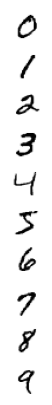

In [119]:
plt.figure(figsize=(2,5))
for i in range(10):
    plt.subplot(10,1,i+1)
    plt.imshow(X_train[Y_train==i][0], cmap='Greys')
    plt.axis('off')
    

### Print those numbers as pixel values

In [109]:
import sys
for x in range(10):
    for i in X_train[Y_train==x][0]:
        for j in i:
            sys.stdout.write('%d\t' % j)
        sys.stdout.write('\n')
    print()
    print()

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	51	159	253	159	50	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	48	238	252	252	252	237	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	54	227	253	252	239	233	252	57	6	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	10	60	224	252	253	252	202	84	252	253	122	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	163	252	252	252	253	252	252	96	189	253	167	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	51	238	253	253	190	114	253	228	47	79	255	168	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	48	238	252	252	179	12	75	121	21	0	0	253	243	50	0	0	0	0	0	
0	0	0	0	0	0	0	0	38	165	253	233	208	84	0	0	0	0	0	0	253	252	165	0	0	0	0	0	
0	0	0	0	0	0	0	7	178	252	240	71	19	28	0	0	0	0	0	0	253	252	195	0	0	0	0	0	
0	0	0	0	0	0	0	57	252	252	63	0	0	0	0	0	0	0	0	0	253	252	195	0	0	0	0	0	
0	0	0	0	0	0	0	198	253	190	0	0	0	0	0	0	0	0	0	0	

### Reshaping dimension

In [135]:
X_train = np.reshape(X_train, (X_train.shape[0],-1) )
X_test = np.reshape(X_test, (X_test.shape[0],-1) )

### Normalization

In [111]:
X_train = X_train / 256
X_test= X_test/ 256

### Cateorization

In [112]:
Y_test = to_categorical(Y_test)
Y_train = to_categorical(Y_train)

### Model save directory setting

In [7]:
save_path = './Results/'
if not os.path.exists(save_path):
    os.mkdir(save_path)

### Model definition

In [14]:
def MNISTModel ():
    InpL = Input(X_train.shape[-1])
    DenseL = Dense(200, activation='relu')(InpL)
    DenseL = Dense(100, activation='relu')(DenseL)
    DenseL = Dense(20, activation='relu')(DenseL)
    OutPut = Dense(Y_train.shape[1], activation='softmax')(DenseL)

    return Model(InpL,OutPut)   
    

In [30]:
### Model checkpoint
ModelSaveSameName = save_path+'MNISTM.hdf5'
ModelSave = ModelCheckpoint(filepath=ModelSaveSameName, monitor='val_loss', verbose=1, save_best_only=True)

### Model Early stop
EarlyStop = EarlyStopping(monitor='val_loss', patience=30)

MNISTM = MNISTModel()
MNISTM.compile(loss=tf.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
MNISTHist = MNISTM.fit(X_train, Y_train, validation_data=(X_test,Y_test), epochs=200, batch_size=100,  verbose=1, callbacks=[ModelSave, EarlyStop])

Epoch 1/200
600/600 [==============================] - 2s 3ms/step - loss: 0.5659 - accuracy: 0.8318 - val_loss: 0.1328 - val_accuracy: 0.9593

Epoch 00001: val_loss improved from inf to 0.13278, saving model to ./Results\MNISTM.hdf5
Epoch 2/200
600/600 [==============================] - 2s 3ms/step - loss: 0.1240 - accuracy: 0.9640 - val_loss: 0.0983 - val_accuracy: 0.9702

Epoch 00002: val_loss improved from 0.13278 to 0.09830, saving model to ./Results\MNISTM.hdf5
Epoch 3/200
600/600 [==============================] - 2s 3ms/step - loss: 0.0745 - accuracy: 0.9779 - val_loss: 0.0841 - val_accuracy: 0.9738

Epoch 00003: val_loss improved from 0.09830 to 0.08411, saving model to ./Results\MNISTM.hdf5
Epoch 4/200
600/600 [==============================] - 2s 3ms/step - loss: 0.0530 - accuracy: 0.9833 - val_loss: 0.0747 - val_accuracy: 0.9786

Epoch 00004: val_loss improved from 0.08411 to 0.07468, saving model to ./Results\MNISTM.hdf5
Epoch 5/200
600/600 [==============================]

### Model weight load and evaluate it

In [27]:
MNISTM = MNISTModel()
MNISTM.compile(loss=tf.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])
print('Before loading weights')
print(MNISTM.evaluate(X_test,Y_test))
print()

MNISTM.load_weights(ModelSaveSameName)
print('After loading weights')
print(MNISTM.evaluate(X_test,Y_test))

Before loading weights
313/313 [==============================] - 1s 1ms/step - loss: 0.7501 - accuracy: 0.1028
[0.7536782622337341, 0.09889999777078629]

After loading weights
313/313 [==============================] - 1s 2ms/step - loss: 0.2235 - accuracy: 0.9784
[0.22347016632556915, 0.9783999919891357]


### Plot loss graphs

Text(0, 0.5, 'loss')

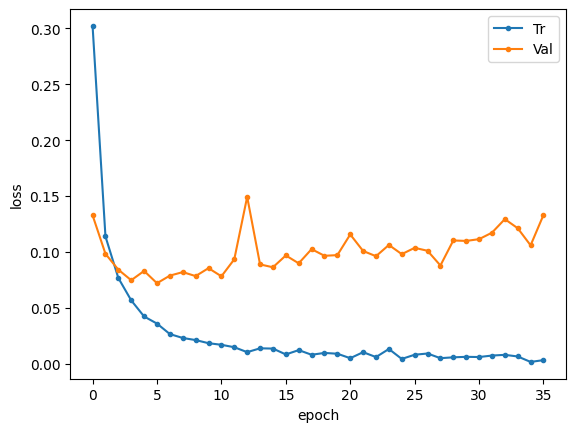

In [32]:
plt.plot(MNISTHist.history['loss'], label='Tr', marker='.')
plt.plot(MNISTHist.history['val_loss'], label='Val', marker='.')
plt.legend() 
plt.xlabel('epoch')
plt.ylabel('loss')